In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
from ultralytics import YOLO

## 0. Functions

In [2]:
def convert_from_yolo_to_cv2(input_txt, width=28*5, height=28):
    
    updated=[]
    annotations = input_txt.split('\n')[:-1]
#     num_digits = len(annotations)
#     width = 28*5
#     height = 28
    
    for i in annotations:
        temp = i.split(' ')
        temp[1] = round(float(temp[1])*(width))
        temp[2] = round(float(temp[2])*(height))
        temp[3] = round(float(temp[3])*(width))
        temp[4] = round(float(temp[4])*(height))

        # x min
        x_min = int(temp[1]-temp[3]/2)
        x_max = int(temp[1]+temp[3]/2)
        y_min = int(temp[2]-temp[4]/2)
        y_max = int(temp[2]+temp[4]/2)

        updated.append([temp[0], x_min,x_max,y_min,y_max])
    
    return updated

In [3]:
def get_img_with_boxes(img_sample, ann_sample):
    img_sample = np.array(img_sample)
    
    for i in ann_sample:
        img_sample = cv2.rectangle(np.array(img_sample),
                                   pt1=(i[1],i[4]),
                                   pt2=(i[2],i[3]),
                                   color=(255,255,255), thickness=1)
        img_sample = cv2.putText(img_sample, i[0], (i[1], i[4]- 3),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,10,255), 1)
                
    return img_sample

## Run model prediction (GANs perturbation, 256)

In [4]:
model=YOLO('./model_results/model_digit_data_ver1_256/weights/best.pt')

In [5]:
data = os.listdir('./sample_perturbed_images/')
data_perturbed = [i for i in data if 'perturbed_' in i]
data_perturbed_label = [i.replace('png','txt') for i in data_perturbed]

In [6]:
data_org = [i for i in data if 'original' in i]
data_org

['original_9998.png',
 'original_9999.png',
 'original_1.png',
 'original_0.png',
 'original_2.png',
 'original_3.png',
 'original_4.png',
 'original_9997.png',
 'original_9996.png',
 'original_9995.png']

In [8]:
data_perturbed_label

['perturbed_9995.txt',
 'perturbed_9996.txt',
 'perturbed_9997.txt',
 'perturbed_4.txt',
 'perturbed_1.txt',
 'perturbed_0.txt',
 'perturbed_2.txt',
 'perturbed_3.txt',
 'perturbed_9999.txt',
 'perturbed_9998.txt']

In [9]:
for img in data_perturbed:
    model.predict(f'./sample_perturbed_images/{img}', save_txt=True)


image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/sample_perturbed_images/perturbed_9995.png: 64x256 1 1, 2 5s, 1 6, 1 8, 27.8ms
Speed: 1.1ms preprocess, 27.8ms inference, 9.2ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict9
1 label saved to runs/detect/predict9/labels

image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/sample_perturbed_images/perturbed_9996.png: 64x256 1 3, 1 4, 1 5, 1 7, 1 9, 8.0ms
Speed: 0.1ms preprocess, 8.0ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict9
2 labels saved to runs/detect/predict9/labels

image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/sample_perturbed_images/perturbed_9997.png: 64x256 1 1, 1 5, 1 6, 1 8, 1 9, 9.4ms
Speed: 0.1ms preprocess, 9.4ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict9
3 labels sa

In [10]:
# images
perturbed_list = []

for img in data_perturbed:
    perturbed_list.append(np.array(Image.open(f'./sample_perturbed_images/{img}')))

perturbed_ann_list = []
for file in data_perturbed_label:
    with open(f'./runs/detect/predict9/labels/{file}', "r") as f:
        sample_annotation = f.read()
        perturbed_ann_list.append(convert_from_yolo_to_cv2(sample_annotation))
        f.close()

In [11]:
# ORIGINAL 
org_list=[]
for img in data_org:
    org_list.append(np.array(Image.open(f'./sample_perturbed_images/{img}')))

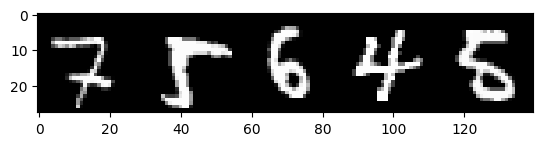

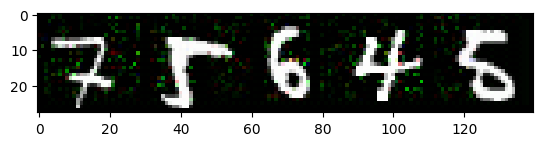

In [12]:
plt.imshow(org_list[0])
plt.show()
plt.imshow(perturbed_list[-1])
plt.show()
# perturbation is almost imperceptible

In [13]:
np.sum(perturbed_list[-1]!=org_list[0])/np.sum(org_list[0]==org_list[0])

0.23877551020408164

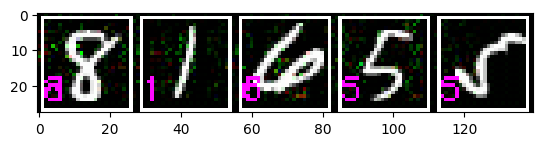

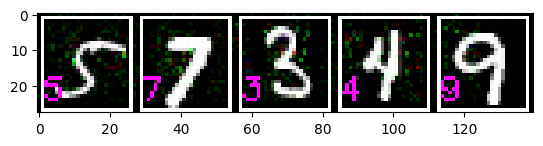

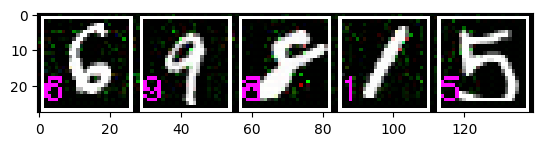

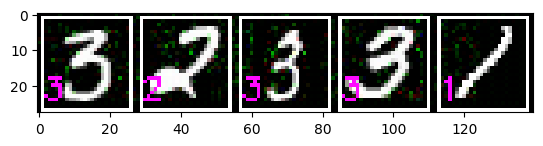

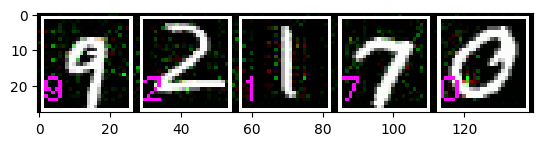

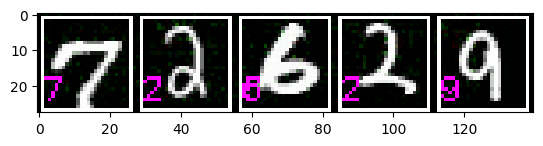

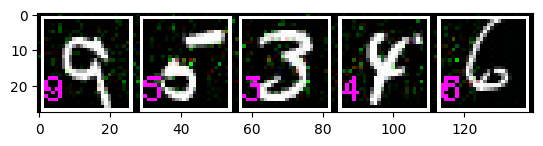

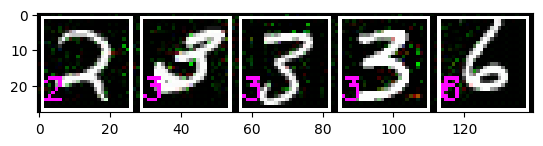

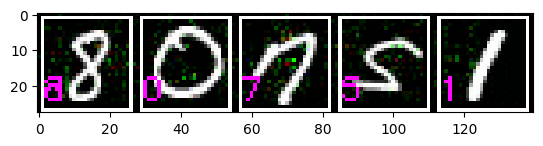

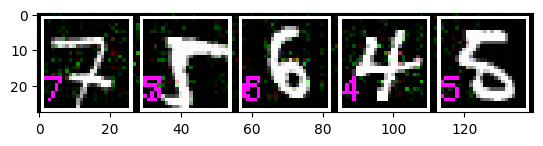

In [14]:
for i in range(len(perturbed_list)):
    img_temp = get_img_with_boxes(perturbed_list[i], perturbed_ann_list[i])
    
    plt.imshow(img_temp)
    plt.show()


## Run model prediction (GANs perturbation, 128)

In [2]:
model=YOLO('./model_results/train/weights/best.pt')

In [3]:
for img in ['perturbed_0.png', 'perturbed_1.png','perturbed_2.png', 'perturbed_3.png','perturbed_4.png']:
    model.predict(f'./sample_perturbed_images/{img}', save_txt=True)


image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/sample_perturbed_images/perturbed_0.png: 128x640 (no detections), 42.4ms
Speed: 1.1ms preprocess, 42.4ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7
0 label saved to runs/detect/predict7/labels

image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/sample_perturbed_images/perturbed_1.png: 128x640 1 0, 26.1ms
Speed: 0.2ms preprocess, 26.1ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7
1 label saved to runs/detect/predict7/labels

image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/sample_perturbed_images/perturbed_2.png: 128x640 (no detections), 23.2ms
Speed: 0.3ms preprocess, 23.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7
1 label saved to runs/detect/predict7/labels



In [4]:
for img in ['original_0.png','original_1.png', 'original_2.png','original_3.png','original_4.png']:
    model.predict(f'./sample_perturbed_images/{img}', save_txt=True)


image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/sample_perturbed_images/original_0.png: 128x640 2 2s, 1 6, 1 7, 1 9, 47.4ms
Speed: 0.8ms preprocess, 47.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7
4 labels saved to runs/detect/predict7/labels

image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/sample_perturbed_images/original_1.png: 128x640 1 0, 1 2, 1 7, 1 9, 26.1ms
Speed: 0.2ms preprocess, 26.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7
5 labels saved to runs/detect/predict7/labels

image 1/1 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/sample_perturbed_images/original_2.png: 128x640 1 3, 1 4, 1 6, 1 9, 23.7ms
Speed: 0.2ms preprocess, 23.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7
6 labels saved to runs/de

In [11]:
# images
img_list = []

for img in ['perturbed_1.png','perturbed_3.png','perturbed_4.png']:
    img_list.append(np.array(Image.open(f'./sample_perturbed_images/{img}')))

ann_list = []
for file in ['perturbed_1.txt','perturbed_3.txt','perturbed_4.txt']:
    with open(f'./runs/detect/predict7/labels/{file}', "r") as f:
        sample_annotation = f.read()
        ann_list.append(convert_from_yolo_to_cv2(sample_annotation))
        f.close()

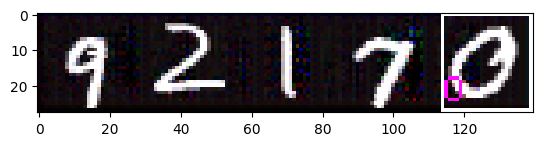

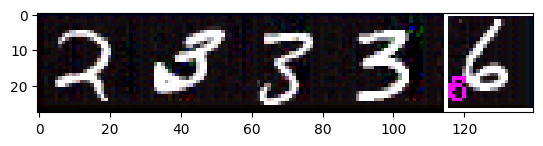

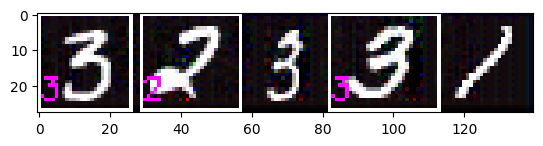

In [12]:
for i in range(len(img_list)):
    img_temp = get_img_with_boxes(img_list[i], ann_list[i])
    
    plt.imshow(img_temp)
    plt.show()


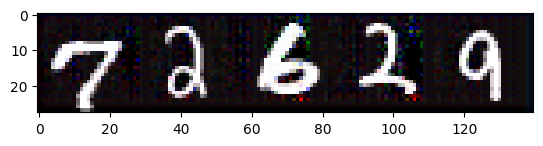

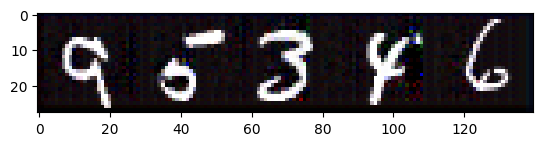

In [17]:
missed = []
for img in ['perturbed_0.png','perturbed_2.png']:
    missed.append(np.array(Image.open(f'./sample_perturbed_images/{img}')))
    
for i in missed:
    plt.imshow(i)
    plt.show()
    

In [13]:
# ORIGINAL 
img_list = []

for img in ['original_0.png','original_1.png', 'original_2.png','original_3.png','original_4.png']:
    img_list.append(np.array(Image.open(f'./sample_perturbed_images/{img}')))

ann_list = []
for file in ['original_0.txt','original_1.txt', 'original_2.txt','original_3.txt','original_4.txt']:
    with open(f'./runs/detect/predict5/labels/{file}', "r") as f:
        sample_annotation = f.read()
        ann_list.append(convert_from_yolo_to_cv2(sample_annotation))
        f.close()

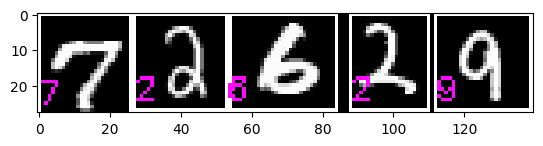

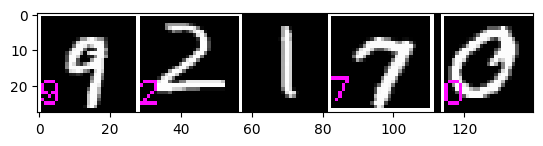

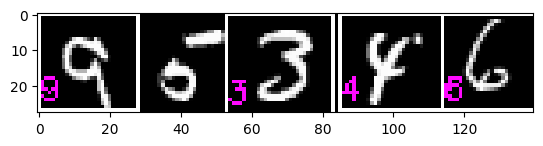

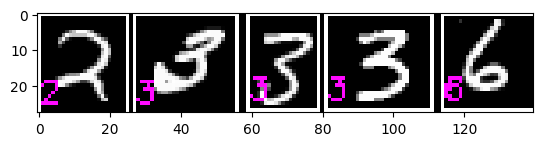

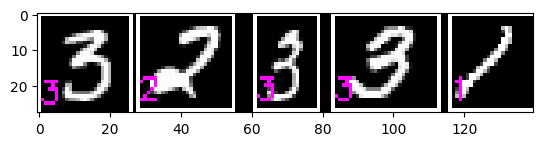

In [14]:
for i in range(len(img_list)):
    img_temp = get_img_with_boxes(img_list[i], ann_list[i])
    
    plt.imshow(img_temp)
    plt.show()


## 256 imgsz data

In [21]:
model=YOLO('./model_results/model_digit_data_ver1_256/weights/best.pt')

In [22]:
model.predict(f'./data/digits_data_ver1/test/images/', save_txt=True)


image 1/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/0.png: 64x256 1 3, 1 6, 1 7, 2 8s, 14.8ms
image 2/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/1.png: 64x256 1 1, 1 3, 1 5, 1 7, 1 8, 11.8ms
image 3/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/10.png: 64x256 1 3, 1 4, 1 6, 1 7, 1 8, 12.3ms
image 4/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/11.png: 64x256 1 1, 2 4s, 1 7, 1 9, 12.6ms
image 5/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/12.png: 64x256 1 1, 2 2s, 1 5, 1 6, 10.1ms
image 6/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/13.png: 64x256 1 0, 1 8, 3 9s, 8.9ms
image 7/100 /Users/jay.je/D

image 52/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/55.png: 64x256 1 0, 1 2, 1 3, 1 4, 1 6, 9.8ms
image 53/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/56.png: 64x256 1 3, 1 4, 1 6, 2 9s, 10.2ms
image 54/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/57.png: 64x256 3 0s, 2 5s, 11.5ms
image 55/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/58.png: 64x256 1 0, 2 3s, 1 5, 1 8, 8.6ms
image 56/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/59.png: 64x256 1 2, 2 3s, 1 4, 1 7, 9.2ms
image 57/100 /Users/jay.je/Documents/CU_courses/spring2023/HPML/e6998-5_final_project/data/digits_data_ver1/test/images/6.png: 64x256 1 1, 1 2, 1 4, 2 5s, 9.1ms
image 58/100 /Users/jay.je/Docum

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0

In [23]:
# images
img_list = []

for img in ['10.png','20.png','30.png','40.png']:
    img_list.append(np.array(Image.open(f'./data/digits_data_ver1/test/images/{img}')))

ann_list = []
for file in ['10.txt','20.txt','30.txt','40.txt']:
    with open(f'./runs/detect/predict6/labels/{file}', "r") as f:
        sample_annotation = f.read()
        ann_list.append(convert_from_yolo_to_cv2(sample_annotation))
        f.close()

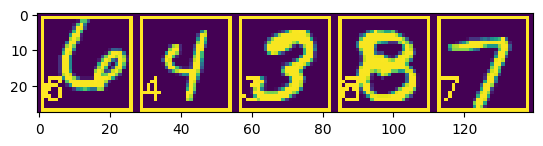

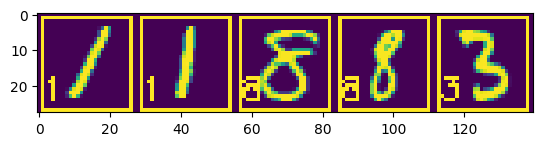

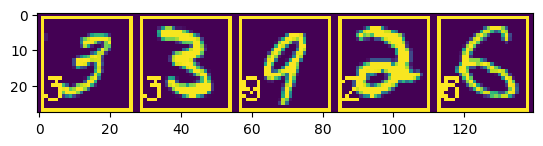

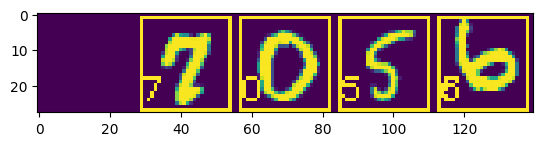

In [24]:
for i in range(len(img_list)):
    img_temp = get_img_with_boxes(img_list[i], ann_list[i])
    
    plt.imshow(img_temp)
    plt.show()

## YOLO inference for google data

In [3]:
model_g=YOLO('./data/model_google_digits_data/weights/best.pt')

In [ ]:
# for img in ['1013.png','7082.png', '9981.png','695.png','802.png','1273.png']:
model_g.predict(f'./data/google_digit_data/test/images/', save_txt=True)

In [28]:
# images
img_list = []

for img in ['100.png','200.png','300.png','400.png','500.png']:
    img_list.append(np.array(Image.open(f'./data/google_digit_data/test/images/{img}')))

ann_list = []
for file in ['100.txt','200.txt','300.txt','400.txt','500.txt']:
    with open(f'./runs/detect/predict3/labels/{file}', "r") as f:
        sample_annotation = f.read()
        ann_list.append(sample_annotation)
        f.close()

In [29]:
ann_list_fin = []
for idx, val in enumerate(ann_list):
    print(img_list[idx].shape)
    h = img_list[idx].shape[0]
    w = img_list[idx].shape[1]
    ann_list_fin.append(convert_from_yolo_to_cv2(val, w, h))

(133, 353, 3)
(108, 229, 3)
(43, 86, 3)
(136, 418, 3)
(48, 134, 3)


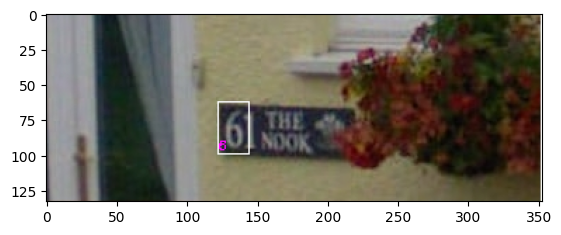

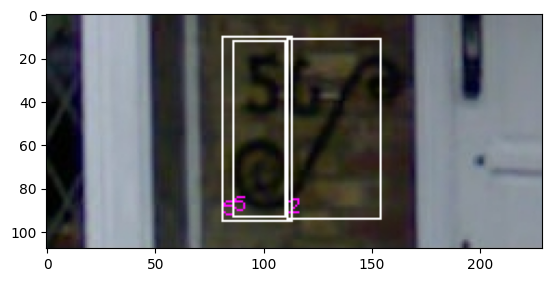

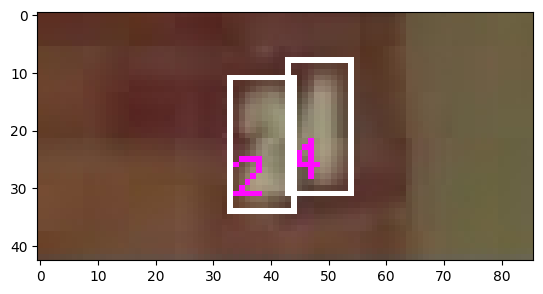

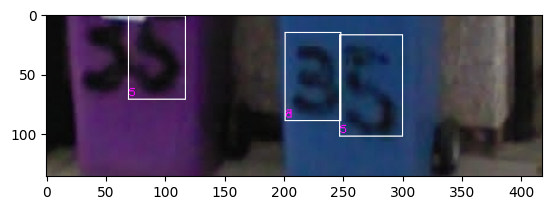

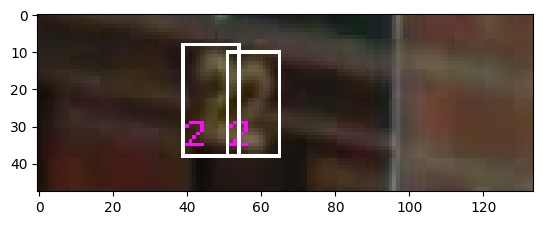

In [30]:
for i in range(len(img_list)):
    img_temp = get_img_with_boxes(img_list[i], ann_list_fin[i])
    
    plt.imshow(img_temp)
    plt.show()